   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.0 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-7e820c539409>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_return'] = df['Adj Close'].pct_change()
<ipython-input-1-7e820c539409>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-7e820c539409>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

AAPL - Hidden State 0
Mean: 0.00183
Variance: 0.01119

AAPL - Hidden State 1
Mean: -0.00077
Variance: 0.02098

AAPL - Hidden State 2
Mean: 0.00852
Variance: 0.03161

AAPL - Hidden State 3
Mean: -0.00236
Variance: 0.05152



GOOGL - Hidden State 0
Mean: -0.00058
Variance: 0.02373

GOOGL - Hidden State 1
Mean: 0.00595
Variance: 0.06526

GOOGL - Hidden State 2
Mean: 0.00151
Variance: 0.01003

GOOGL - Hidden State 3
Mean: -0.00039
Variance: 0.01769

MSFT - Hidden State 0
Mean: 0.00260
Variance: 0.05162

MSFT - Hidden State 1
Mean: 0.00094
Variance: 0.01213

MSFT - Hidden State 2
Mean: 0.00006
Variance: 0.02088

MSFT - Hidden State 3
Mean: 0.00148
Variance: 0.00991



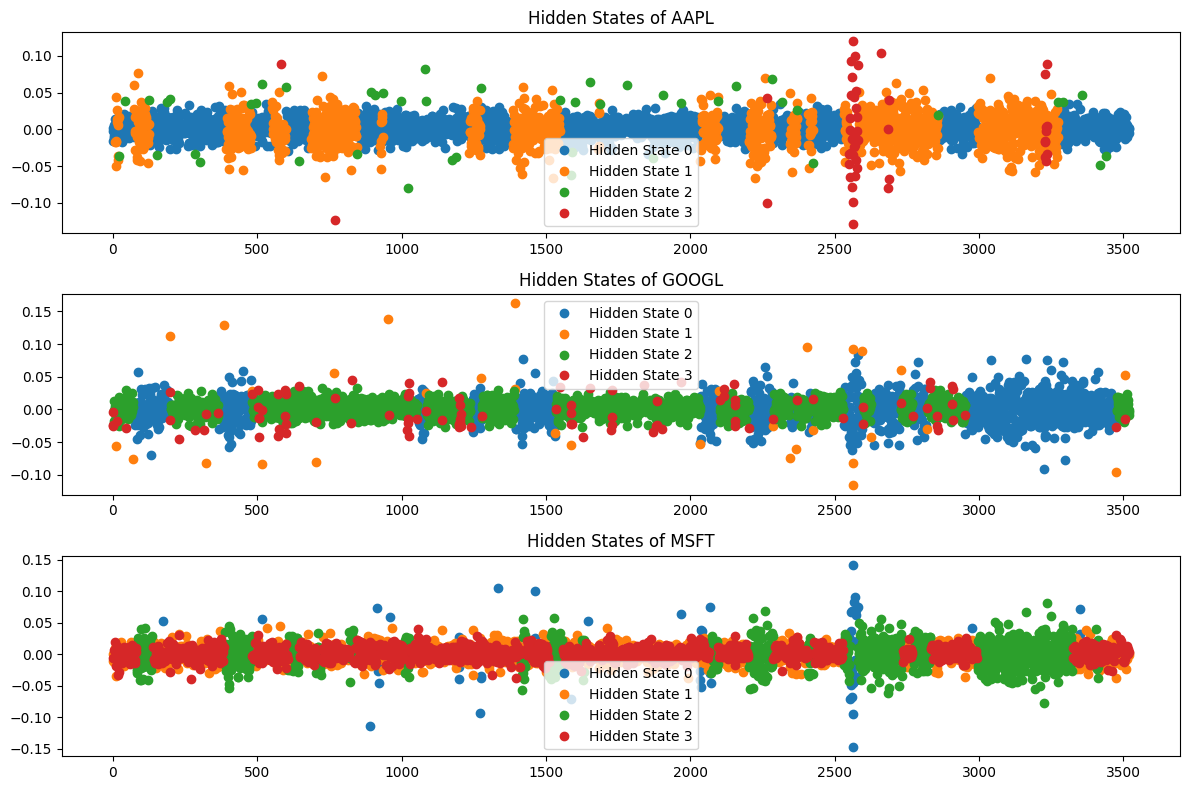

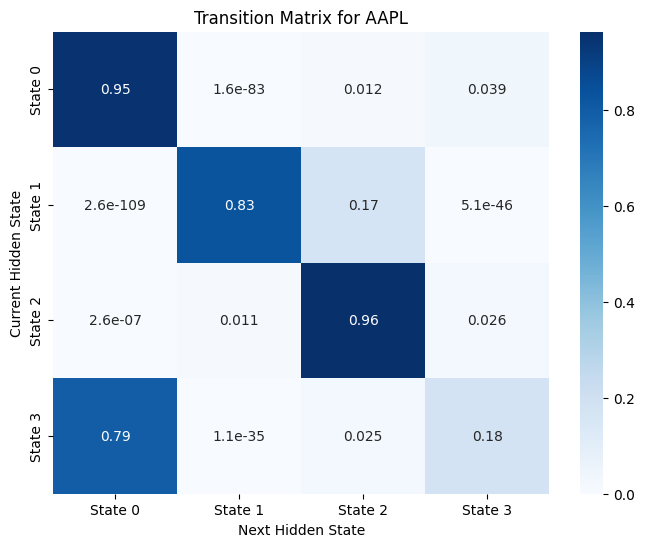

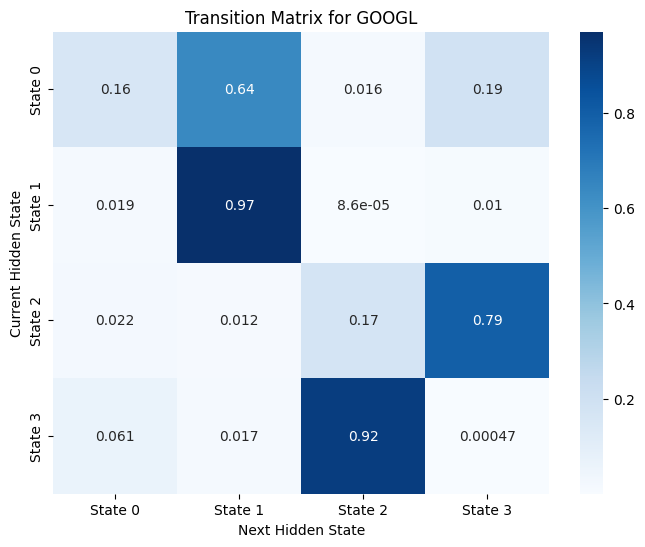

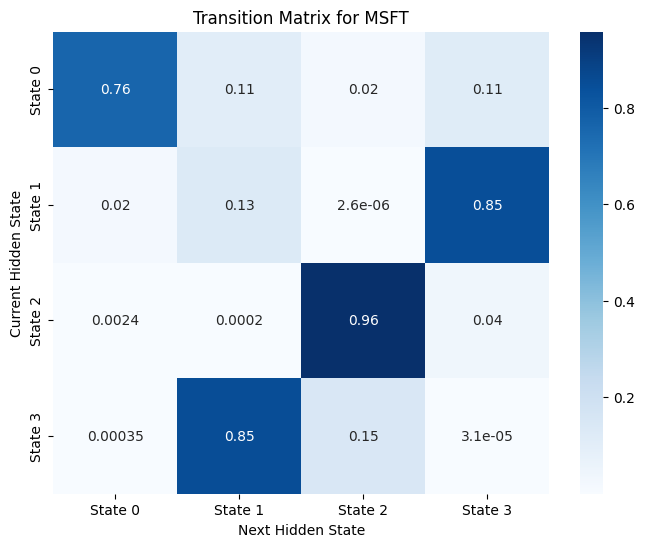

In [1]:
!pip install yfinance
!pip install hmmlearn
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
import seaborn as sns

# Function to fetch and preprocess data
def fetch_and_preprocess_data(ticker):
    df = yf.download(ticker, start="2010-01-01", end="2023-12-31")
    df = df[['Adj Close']]
    df['daily_return'] = df['Adj Close'].pct_change()
    df.dropna(inplace=True)
    return df['daily_return'].values.reshape(-1, 1)

# Part 1: Data Collection and Preprocessing for Multiple Tickers
tickers = ['AAPL', 'GOOGL', 'MSFT']
data_dict = {}

for ticker in tickers:
    data_dict[ticker] = fetch_and_preprocess_data(ticker)

# Part 2: Gaussian Hidden Markov Model
n_hidden_states = 4

# Prepare plots
plt.figure(figsize=(12, 8))

for ticker, daily_returns in data_dict.items():
    model = GaussianHMM(n_components=n_hidden_states, covariance_type="diag", n_iter=1000)
    model.fit(daily_returns)
    hidden_states = model.predict(daily_returns)

    df = pd.DataFrame(data=daily_returns, columns=['daily_return'])
    df['hidden_state'] = hidden_states

    means = model.means_
    variances = np.sqrt(model.covars_)

    for i in range(n_hidden_states):
        print(f"{ticker} - Hidden State {i}")
        print(f"Mean: {means[i][0]:.5f}")
        variance_value = variances[i][0].item()
        print(f"Variance: {variance_value:.5f}\n")

    plt.subplot(len(tickers), 1, tickers.index(ticker) + 1)
    for i in range(n_hidden_states):
        state = (hidden_states == i)
        plt.plot(df.index[state], df['daily_return'][state], 'o', label=f"Hidden State {i}")

    plt.title(f'Hidden States of {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

# Part 3: Transition Matrix Visualization for Each Ticker
for ticker, daily_returns in data_dict.items():
    model = GaussianHMM(n_components=n_hidden_states, covariance_type="diag", n_iter=1000)
    model.fit(daily_returns)

    transition_matrix = model.transmat_

    plt.figure(figsize=(8, 6))
    sns.heatmap(transition_matrix, annot=True, cmap='Blues', xticklabels=[f'State {i}' for i in range(n_hidden_states)],
                yticklabels=[f'State {i}' for i in range(n_hidden_states)])
    plt.title(f'Transition Matrix for {ticker}')
    plt.xlabel('Next Hidden State')
    plt.ylabel('Current Hidden State')
    plt.show()
